In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [50]:
churnData = pd.read_csv('Data/churn.csv')

In [51]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Clean Data

In [52]:
churnData.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [53]:
def col_to_binom(x):
    """Change churn column from yes and no to binomial values"""

    if x == "No":
        return 0
    elif x == "Yes":
        return 1

In [54]:
churnData.Churn = churnData.Churn.apply(col_to_binom)
churnData.Partner = churnData.Partner.apply(col_to_binom)
churnData.Dependents = churnData.Dependents.apply(col_to_binom)
churnData.PhoneService = churnData.PhoneService.apply(col_to_binom)
churnData.OnlineSecurity = churnData.OnlineSecurity.apply(col_to_binom)
churnData.OnlineBackup = churnData.OnlineBackup.apply(col_to_binom)
churnData.DeviceProtection = churnData.DeviceProtection.apply(col_to_binom)
churnData.TechSupport = churnData.TechSupport.apply(col_to_binom)
churnData.StreamingTV = churnData.StreamingTV.apply(col_to_binom)
churnData.StreamingMovies = churnData.StreamingMovies.apply(col_to_binom)

In [55]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,29.85,29.85,0
1,Male,0,0,0,34,1,1.0,0.0,1.0,0.0,0.0,0.0,One year,56.95,1889.5,0
2,Male,0,0,0,2,1,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,53.85,108.15,1
3,Male,0,0,0,45,0,1.0,0.0,1.0,1.0,0.0,0.0,One year,42.30,1840.75,0
4,Female,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1.0,0.0,1.0,1.0,1.0,1.0,One year,84.80,1990.5,0
7039,Female,0,1,1,72,1,0.0,1.0,1.0,0.0,1.0,1.0,One year,103.20,7362.9,0
7040,Female,0,1,1,11,0,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,29.60,346.45,0
7041,Male,1,1,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,74.40,306.6,1


In [56]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [57]:
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors='coerce')

In [58]:
churnData.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [59]:
def gender_to_binom(x):
    """Change gender column from male and female to binomial values"""

    if x == "Male":
        return 0
    elif x == "Female":
        return 1

In [60]:
churnData.gender = churnData.gender.apply(gender_to_binom)

In [61]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,29.85,29.85,0
1,0,0,0,0,34,1,1.0,0.0,1.0,0.0,0.0,0.0,One year,56.95,1889.50,0
2,0,0,0,0,2,1,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,53.85,108.15,1
3,0,0,0,0,45,0,1.0,0.0,1.0,1.0,0.0,0.0,One year,42.30,1840.75,0
4,1,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.0,0.0,1.0,1.0,1.0,1.0,One year,84.80,1990.50,0
7039,1,0,1,1,72,1,0.0,1.0,1.0,0.0,1.0,1.0,One year,103.20,7362.90,0
7040,1,0,1,1,11,0,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,29.60,346.45,0
7041,0,1,1,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,74.40,306.60,1


In [62]:
churnData.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [63]:
def contract_to_num(x):
    """Change contract column to numerical values"""

    if x == "Month-to-month":
        return 1
    elif x == "One year":
        return 12
    elif x == "Two year":
        return 24

In [64]:
churnData.Contract = churnData.Contract.apply(contract_to_num)

In [65]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,29.85,29.85,0
1,0,0,0,0,34,1,1.0,0.0,1.0,0.0,0.0,0.0,12,56.95,1889.50,0
2,0,0,0,0,2,1,1.0,1.0,0.0,0.0,0.0,0.0,1,53.85,108.15,1
3,0,0,0,0,45,0,1.0,0.0,1.0,1.0,0.0,0.0,12,42.30,1840.75,0
4,1,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.0,0.0,1.0,1.0,1.0,1.0,12,84.80,1990.50,0
7039,1,0,1,1,72,1,0.0,1.0,1.0,0.0,1.0,1.0,12,103.20,7362.90,0
7040,1,0,1,1,11,0,1.0,0.0,0.0,0.0,0.0,0.0,1,29.60,346.45,0
7041,0,1,1,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,1,74.40,306.60,1


In [66]:
churnData.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract              int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [67]:
churnData.isna().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [68]:
def replace_nulls(x):
    """ Replace null values with the mean of the column"""
    
    mean = np.mean(x)
    x = x.fillna(mean, inplace=True)
    

In [69]:
replace_nulls(churnData.TotalCharges)

In [70]:
churnData = churnData.dropna()

### X-y Split

In [71]:
X = churnData.drop(columns='Churn')

In [72]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [73]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,29.85,29.85
1,0,0,0,0,34,1,1.0,0.0,1.0,0.0,0.0,0.0,12,56.95,1889.50
2,0,0,0,0,2,1,1.0,1.0,0.0,0.0,0.0,0.0,1,53.85,108.15
3,0,0,0,0,45,0,1.0,0.0,1.0,1.0,0.0,0.0,12,42.30,1840.75
4,1,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.0,0.0,1.0,1.0,1.0,1.0,12,84.80,1990.50
7039,1,0,1,1,72,1,0.0,1.0,1.0,0.0,1.0,1.0,12,103.20,7362.90
7040,1,0,1,1,11,0,1.0,0.0,0.0,0.0,0.0,0.0,1,29.60,346.45
7041,0,1,1,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,1,74.40,306.60


In [74]:
y = churnData.Churn

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [76]:
log = LogisticRegression() 
trans = PowerTransformer()
trans.fit(X_train)

PowerTransformer()

In [77]:
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)
log.fit(X_train_mod, y_train)

LogisticRegression()

In [78]:
y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

In [79]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.765692,0.787138
1,Precision,0.661871,0.719723
2,Recall,0.527977,0.574586


Confusion matrix for the train set
[[2643  376]
 [ 658  736]]


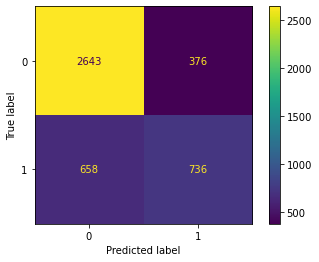



Confusion matrix for the test set
[[661  81]
 [154 208]]


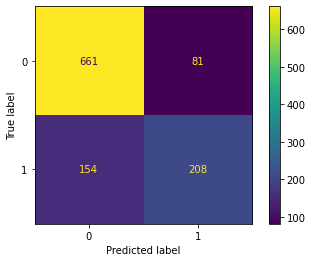

In [80]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

## Decision Tree

,Error_metric,Train,Test
0,Accuracy,0.737140,0.726449
1,Precision,0.630872,0.636364
2,Recall,0.404591,0.386740


Confusion matrix for the train set
[[2689  830]
 [ 330  564]]


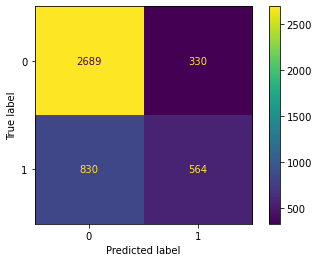



Confusion matrix for the test set
[[662 222]
 [ 80 140]]


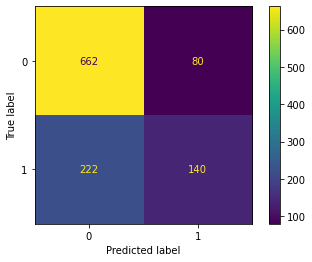

In [81]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

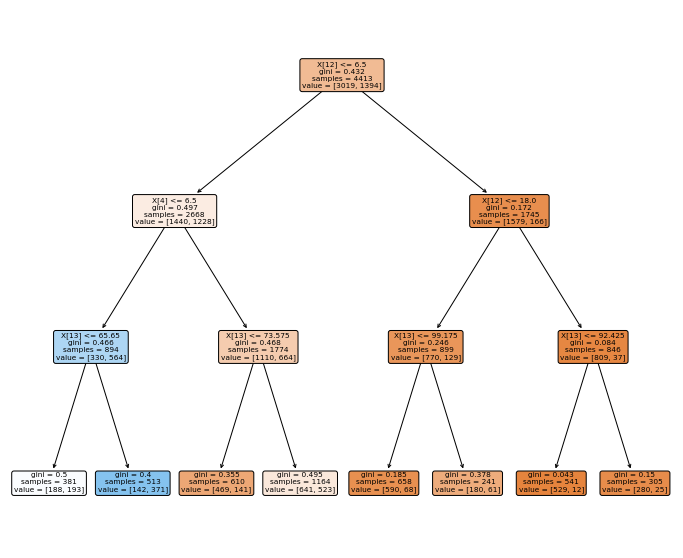

In [82]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [83]:
dt.score(X_test, y_test)

0.7264492753623188

## K-fold cross validation

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [85]:
scores = cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.73499434, 0.7214043 , 0.73952435, 0.73015873, 0.73809524])

In [86]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.73 accuracy with a standard deviation of 0.01


In [87]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [88]:
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0

for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)


{'Regression Tree': 0.6967941022562872, 'Linear Regression': 0.7555032269317984, 'KNN': 0.7178758682960364}


<b> Check for imbalance in y

In [89]:
y.value_counts()

0    3761
1    1756
Name: Churn, dtype: int64

In [90]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 5517, dtype: int64

Use resampling methods to create a balance between the two classes

<b> Upsampling using SMOTE

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [92]:
X_sm, y_sm = smote.fit_resample(X, y)


In [93]:
y_sm.value_counts()


0    3761
1    3761
Name: Churn, dtype: int64

In [94]:
scores = {}
i=0

for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)


{'Regression Tree': 0.7588620694526858, 'Linear Regression': 0.7561906628803933, 'KNN': 0.741564239495917}


<b> Downsampling using TomekLinks

In [95]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

0    3255
1    1756
Name: Churn, dtype: int64

In [96]:
scores = {}
i=0

for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_tl, y_tl, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.7100376935372282, 'Linear Regression': 0.7764884573482517, 'KNN': 0.7375762419384339}
